Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego
sygnału harmonicznego 𝑠[𝑛] = 𝐴 𝑠𝑖𝑛 (2𝜋𝑛 / 𝑁) o amplitudzie 𝐴 = 4 i okresie podstawowym 𝑁 = 52.
W tym celu dla każdej wartości 𝑛0 ∈ {0, 𝑁/4, 𝑁/2, 3𝑁/4} 
wykreślić widmo amplitudowe i fazowe przesuniętego sygnału 𝑠[𝑛 − 𝑛0].
Skomentować otrzymane wyniki.

In [17]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

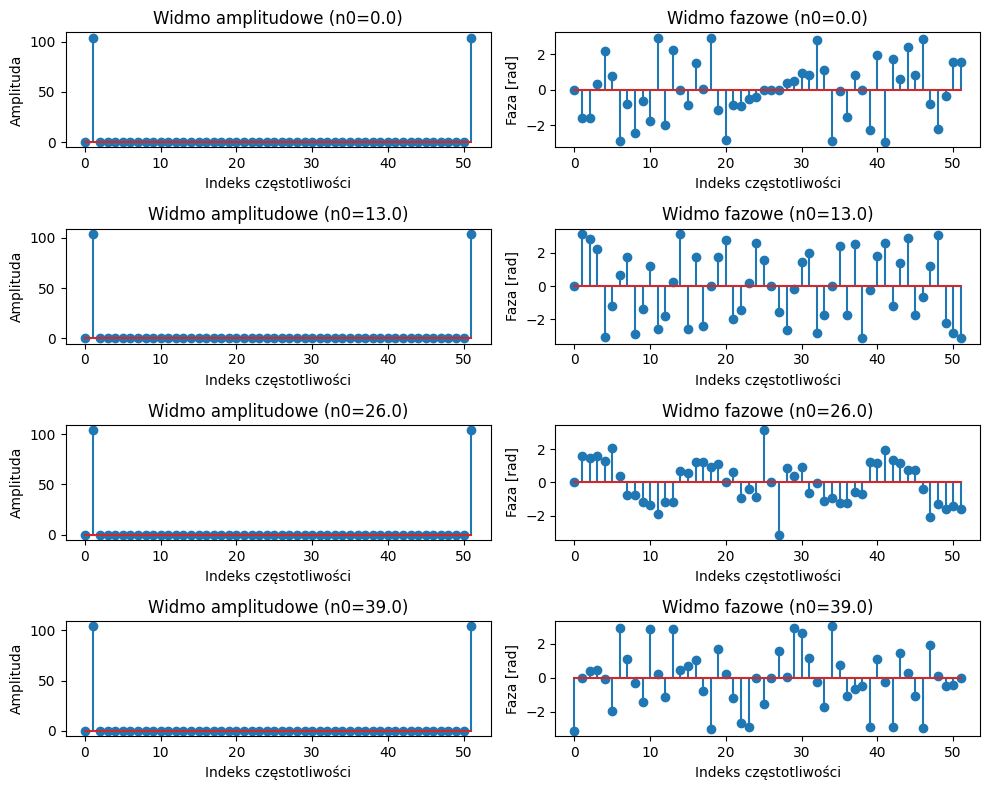

In [18]:
A = 4
N = 52.

signal = lambda n, bias=0: A * np.sin(2 * np.pi * (n - bias) / N)

n = np.arange(N)
n0_array = np.array([0, N/4, N/2, 3 * N/4])

def calc_spectrum(signal):
    return fft(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))

def calc_phase_spectrum(signal):
    return np.angle(calc_spectrum(signal))

fig, axes = plt.subplots(len(n0_array), 2, figsize=(10, 8))

for i, n0 in enumerate(n0_array):
    shifted_signal = signal(n, bias=n0)
    amplitude_spectrum = calc_amplitude_spectrum(shifted_signal)
    phase_spectrum = calc_phase_spectrum(shifted_signal)

    axes[i, 0].stem(amplitude_spectrum)
    axes[i, 0].set_title(f"Widmo amplitudowe (n0={n0})")
    axes[i, 0].set_xlabel("Indeks częstotliwości")
    axes[i, 0].set_ylabel("Amplituda")

    axes[i, 1].stem(phase_spectrum)
    axes[i, 1].set_title(f"Widmo fazowe (n0={n0})")
    axes[i, 1].set_xlabel("Indeks częstotliwości")
    axes[i, 1].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()



Wnioski:

Dodanie przesunięcia w czasie nie miało wpływu na przbieg widma amplitudowego. Jednak znacząco zmienia kształt i przebieg widma fazowego, co widać na powyższych diagramach.